# Plotting individual toy datasets in 2nu-only case

Here we plot some individual fits, to allow us to inspect, by hand, toy datasets which end up with certain upper limits. This exercise allows us to see qualitatively if the results make sense; e.g. if the too-good limits are indeed due to underfluctuations in the background.


## Table of contents:
* ### [Load in the model and 100 toy datasets](#loadingdata)
  * #### [Create masks to select data in certain populations](#creatmasks)
* ### [Fits where limit is less than one count](#lessthanone)
* ### [Fits where limit is greater than 2.5 counts](#greaterthan2p5)
* ### [Fits where limit is near 1.5 counts](#near1p5)
* ### [Fits with limits just below the median](#justbelowmedian)
* ### [Fits with limits just above the median](#abovemedian)

In [2]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts/BaTagging


In [3]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os

import scipy.optimize as opt

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (8,7)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [4]:
# Import the nEXO sensitivity classes
import nEXOMaterialsDBInterface
import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood


<a class="anchor" id="loadingdata"></a>

# Load in the model and 100 toy datasets 

In [13]:
datadir = '/usr/workspace/wsa/nexo/lenardo1/baseline2019_third_pass/'

workspace = nEXOFitWorkspace.nEXOFitWorkspace(config='../../config/Sensitivity2020_BaTagging_config.yaml')
workspace.LoadComponentsTableFromFile(datadir + 'ComponentsTable_D-023_merged-v5_final_cuts_ba_tagging.h5')
workspace.CreateGroupedPDFs()


likelihood = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood.AddPDFDataframeToModel( workspace.df_group_pdfs,\
                                  workspace.histogram_axis_names )

sig_idx = likelihood.model.GetVariableIndexByName('Bb0n')
likelihood.model.variable_list[sig_idx]['Value'] = 1.
bkg_idx = likelihood.model.GetVariableIndexByName('Bb2n')
likelihood.model.variable_list[bkg_idx]['Value'] = likelihood.model.variable_list[bkg_idx]['Value']*0.01

likelihood.model.GenerateModelDistribution()
likelihood.AddDataset( likelihood.model.GenerateDataset() )



Loading input data froma previously-generated components table....

Loaded dataframe with 171 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']

Creating grouped PDFs....
	Group:                              	Expected Counts:
	FullLXeBb2n                         	  14544517.2295
	FullLXeBb0n                         	         0.0001
	Total Sum                           	  14544517.2296


In [17]:
df = pd.read_hdf('/p/lustre1/lenardo1/sensitivity_output/' +\
                 'October13_2020_90CL_with_datasets_interp1d/sens_output_file_90CL_1_00.h5')

df = pd.read_hdf('/p/lustre2/lenardo1/sensitivity_output/' +\
                 'Jan1_2021_90CL_ba_tagging_finer_spacing_interp1d_scaling_study/'
                'ba_tagging_sens_output_file_90CL_scaling_00.01_nodataset_3.h5')
df = pd.read_hdf('ba_tagging_sens_output_file_90CL_scaling_00.01_nodataset_51.h5')
df.head()



,90CL_crossing,best_fit_converged,best_fit_covar,best_fit_iterations,dataset,fixed_fit_acc_covar,fixed_fit_converged,lambda,num_iterations,num_signal
0,1.450181,True,True,1,"Hist(5 bins in [0.0,1.0], 250 bins in [1000.0,...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[1.991633325815201e-06, 0.4978930471697822, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1e-06, 0.250001, 0.500001, 0.750001, 1.000001..."
1,1.110139,True,True,1,"Hist(5 bins in [0.0,1.0], 250 bins in [1000.0,...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[1.98977068066597e-06, 0.49794910522177815, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1e-06, 0.250001, 0.500001, 0.750001, 1.000001..."
2,1.497687,True,True,1,"Hist(5 bins in [0.0,1.0], 250 bins in [1000.0,...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[1.99128407984972e-06, 0.49780490656848997, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1e-06, 0.250001, 0.500001, 0.750001, 1.000001..."
3,1.487686,True,True,1,"Hist(5 bins in [0.0,1.0], 250 bins in [1000.0,...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[1.99128407984972e-06, 0.4978218482574448, 0.9...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1e-06, 0.250001, 0.500001, 0.750001, 1.000001..."
4,2.215277,True,True,1,"Hist(5 bins in [0.0,1.0], 250 bins in [1000.0,...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...","[1.9881408661603928e-06, 0.49728507676627487, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1e-06, 0.250001, 0.500001, 0.750001, 1.000001..."


Text(0, 0.5, 'Num toy datasets')

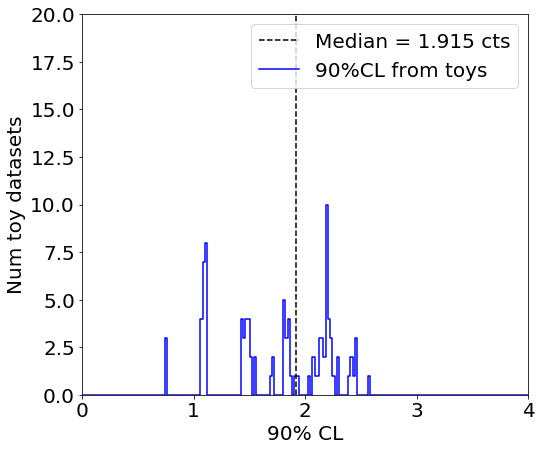

In [18]:
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (8,7)

hcrossing = hl.hist(df['90CL_crossing'],bins=np.linspace(0.,10.,500))

median = 1.915
x = np.ones(20)*median
y = np.linspace(0.,20.,20)

hl.plot1d(hcrossing,label='90%CL from toys')
plt.plot(x,y,'--k',label='Median = {:4.4} cts'.format(median))

plt.ylim(0.,20.)
plt.xlim(0.,4.)
plt.legend()

plt.xlabel('90% CL')
plt.ylabel('Num toy datasets')

<a class="anchor" id="createmasks"></a>
## Create masks to select data in certain populations



In [28]:
bettermask = (df['90CL_crossing']<0.9)
dfbetter = df.loc[bettermask]

onemask = (df['90CL_crossing']<1.2)&(df['90CL_crossing']>1.0)
dfone = df.loc[onemask]

onepfivemask = (df['90CL_crossing']<1.6)&(df['90CL_crossing']>1.4)
dfonepfive = df.loc[onepfivemask]


worsemask = df['90CL_crossing'] > 2.3
dfworse = df.loc[worsemask]

medianmask = (df['90CL_crossing']<1.915)&(df['90CL_crossing']>1.75)
dfmedianmask = df.loc[medianmask]

aftermedianmask = (df['90CL_crossing']>1.915)&(df['90CL_crossing']<2.1)
dfaftermedianmask = df.loc[aftermedianmask]



<a class="anchor" id="lessthanone"></a>
# Fits where the limit is less than one count

90CL: 0.748	Lambdacalc @ 1: 1.992494  	Critical@1: 1.992202
90CL: 0.748	Lambdacalc @ 1.5: 2.98874  	Critical@1.5: 2.986803
90CL: 0.748	Lambdacalc @ 1: 1.99259  	Critical@1: 1.992202
90CL: 0.748	Lambdacalc @ 1.5: 2.988884  	Critical@1.5: 2.986803
90CL: 0.748	Lambdacalc @ 1: 1.992497  	Critical@1: 1.992202
90CL: 0.748	Lambdacalc @ 1.5: 2.988744  	Critical@1.5: 2.986803


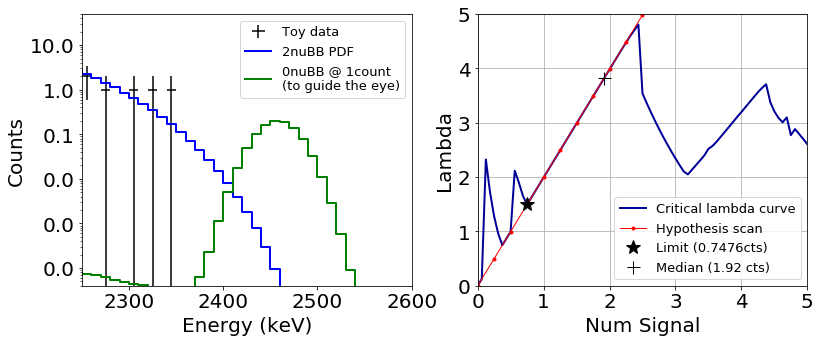

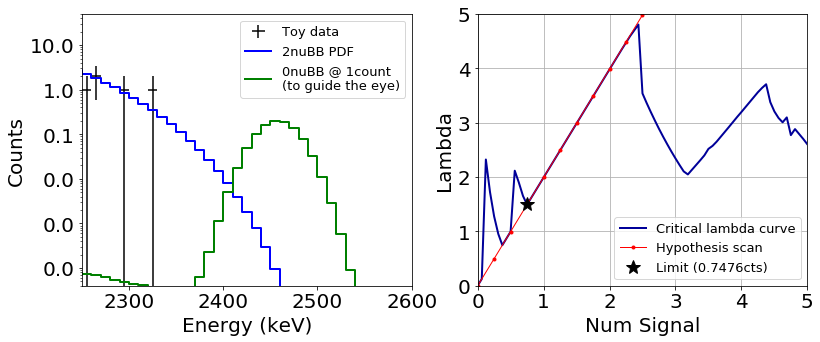

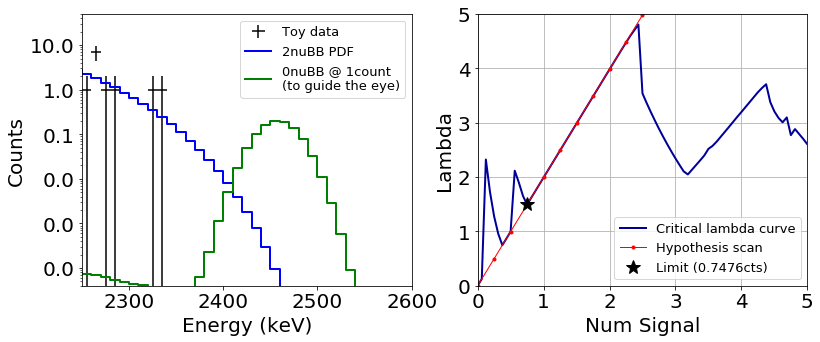

In [31]:
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.backends.backend_pdf import PdfPages


critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_ba_tagging_fine.txt')
critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_2nu_scaling_study_0.01.txt')

plt.rcParams['figure.figsize'] = (13,5)

#pp = PdfPages('Plots/only_2nubkg_fits_better_than_the_median.pdf')
num = 10
if len(dfbetter) < num:
    num = len(dfbetter)


for i in range(num):
    this_dataset = dfbetter['dataset'].iloc[i]
    this_90CL = dfbetter['90CL_crossing'].iloc[i]
    this_numsignal = dfbetter['num_signal'].iloc[i]
    this_lambda = dfbetter['lambda'].iloc[i]
    
    fig,ax = plt.subplots(ncols=2,nrows=1)
    
    hl.plot1d(ax[0],this_dataset.project([1]),color='k',crosses=True,label='Toy data')
    ax[0].set_yscale('log')
    ax[0].set_ylim(0.00004,50.)
    ax[0].set_xlim(2250.,2600.)
    
    
    idx_2nu = likelihood.model.GetVariableIndexByName('Bb2n')
    idx_0nu = likelihood.model.GetVariableIndexByName('Bb0n')
    spec2nu = likelihood.model.pdfs[idx_2nu] * likelihood.model.variable_list[idx_2nu]['Value']
    spec0nu = likelihood.model.pdfs[idx_0nu] * likelihood.model.variable_list[idx_0nu]['Value']
    
    hl.plot1d(ax[0],spec2nu.project([1]),color='b',\
              label='2nuBB PDF',linewidth=2)
    hl.plot1d(ax[0],spec0nu.project([1]),color='g',\
              label='0nuBB @ 1count\n(to guide the eye)',linewidth=2)
    
    #ax[0].set_yticks([0.1,1.,10.],['0.1','1','10'])
    #ax[0].set_yticklabels(['0.1','1','10'])
    ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax[0].get_yaxis().get_major_formatter().labelOnlyBase=False
    ax[0].get_yaxis().get_major_formatter().set_scientific(False)
    ax[0].legend(fontsize=13,loc='upper right')
    ax[0].set_xlabel('Energy (keV)')
    ax[0].set_ylabel('Counts')
    
    Func = interp1d(critlam[:,0],critlam[:,1])
    
    ax[1].plot(critlam[:,0],critlam[:,1],'-',color=(0.,0.,0.6),linewidth=2,label='Critical lambda curve')
    ax[1].set_xlim(0.3,1.)
    ax[1].set_xlim(0.,5.)
    ax[1].set_ylim(0.,5.)
    ax[1].plot(this_numsignal,this_lambda,'-o',color=(1.,0.,0.),\
               linewidth=1.,markersize=3,label='Hypothesis scan')
    #print(this_numsignal)
    ax[1].plot(this_90CL,Func(this_90CL),'*k',markersize=14,\
               label='Limit ({:4.4}cts)'.format(this_90CL))
    if i == 0:
        ax[1].plot(median,Func(median)+0.02,'+',markersize=13,\
               label='Median (1.92 cts)',markerfacecolor='None',\
              markeredgecolor='k',markeredgewidth=1)
    ax[1].set_xlabel('Num Signal')
    ax[1].set_ylabel('Lambda')
    ax[1].legend(fontsize=13,loc='lower right')
    ax[1].grid()
    #pp.savefig(fig,dpi=200,bbox_inches='tight')
    print('90CL: {:3.3}\tLambdacalc @ 1: {:7.7}  \tCritical@1: {:7.7}'.format(\
                    this_90CL,this_lambda[4],Func(1.)))
    print('90CL: {:3.3}\tLambdacalc @ 1.5: {:7.7}  \tCritical@1.5: {:7.7}'.format(\
                    this_90CL,this_lambda[6],Func(1.5)))
    
    if i == 0:
        plt.savefig('single_only_2nubkg_fits_better_than_the_median.png',dpi=200,bbox_inches='tight')
    if i == 0:  
        plt.savefig('example_fit_90CL_lt_0p9_{}.png'.format(i),dpi=200,bbox_inches='tight')
    if i == 1:  
        plt.savefig('example_fit_90CL_lt_0p9_{}.png'.format(i),dpi=200,bbox_inches='tight')
        
    
#pp.close()
    
    
    
    
    
    
    

<a class="anchor" id="greaterthan2p5"></a>
# Fits with limits greater than 2.5 counts

IndexError: single positional indexer is out-of-bounds

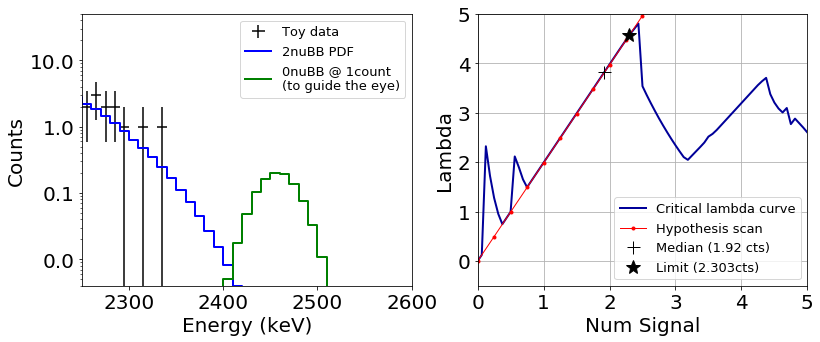

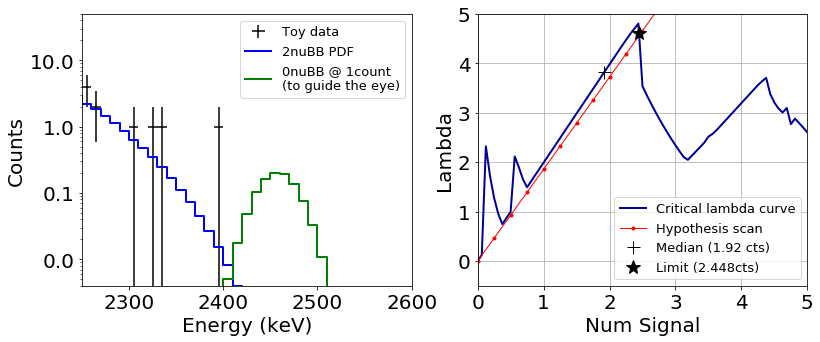

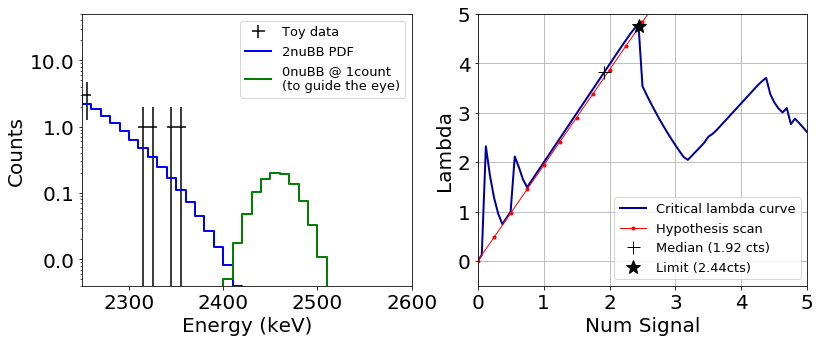

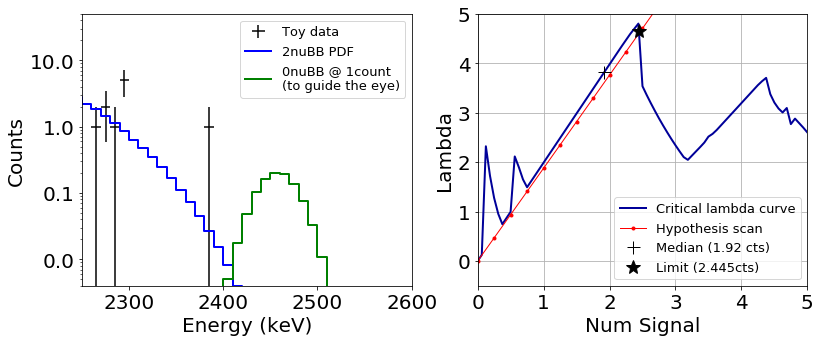

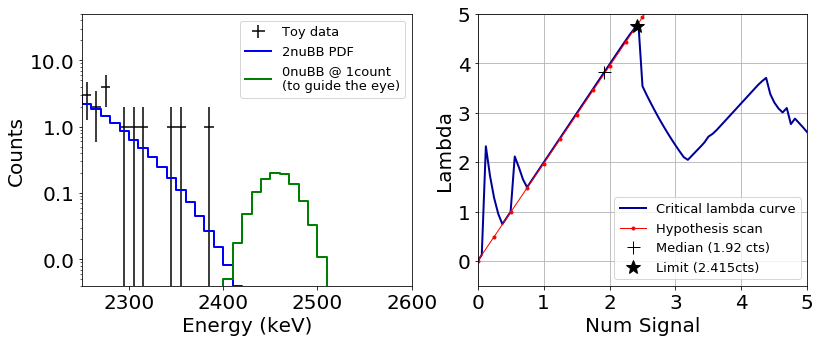

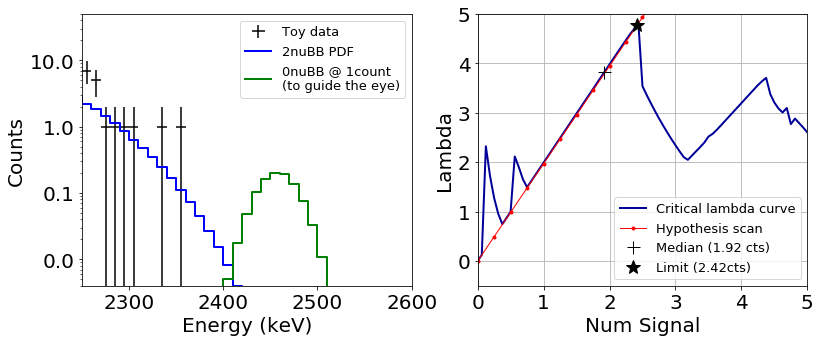

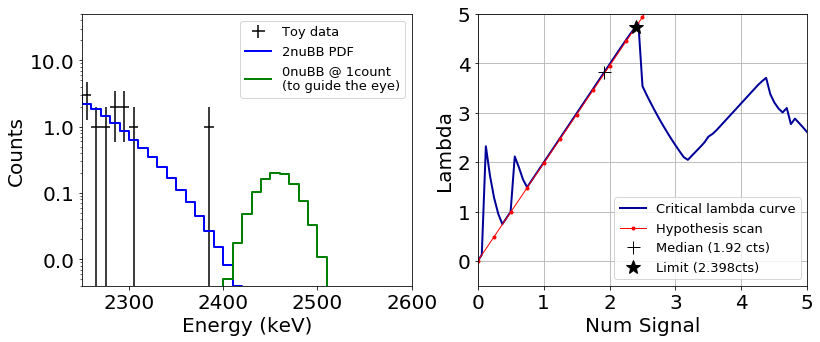

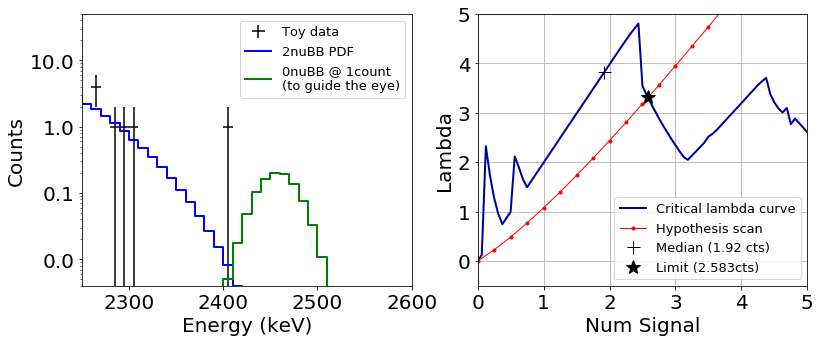

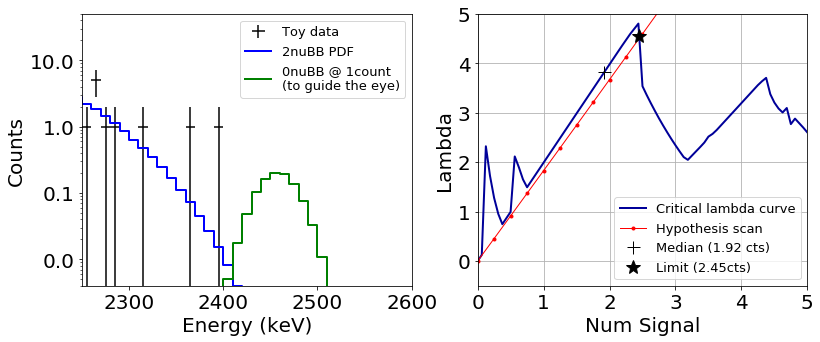

In [30]:
import matplotlib
from scipy.interpolate import interp1d

critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_ba_tagging_fine.txt')
critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_2nu_scaling_study_0.01.txt')

plt.rcParams['figure.figsize'] = (13,5)

pp = PdfPages('Plots/only_2nubkg_fits_worse_than_the_median.pdf')

for i in range(10):
    this_dataset = dfworse['dataset'].iloc[i]
    this_90CL = dfworse['90CL_crossing'].iloc[i]
    this_numsignal = dfworse['num_signal'].iloc[i]
    this_lambda = dfworse['lambda'].iloc[i]
    
    fig,ax = plt.subplots(ncols=2,nrows=1)
    
    hl.plot1d(ax[0],this_dataset.project([1]),color='k',crosses=True,label='Toy data')
    ax[0].set_yscale('log')
    ax[0].set_ylim(0.004,50.)
    ax[0].set_xlim(2250.,2600.)
    
    
    idx_2nu = likelihood.model.GetVariableIndexByName('Bb2n')
    idx_0nu = likelihood.model.GetVariableIndexByName('Bb0n')
    spec2nu = likelihood.model.pdfs[idx_2nu] * likelihood.model.variable_list[idx_2nu]['Value']
    spec0nu = likelihood.model.pdfs[idx_0nu] * likelihood.model.variable_list[idx_0nu]['Value']
    
    hl.plot1d(ax[0],spec2nu.project([1]),label='2nuBB PDF',linewidth=2)
    hl.plot1d(ax[0],spec0nu.project([1]),label='0nuBB @ 1count\n(to guide the eye)',linewidth=2)
    
    #ax[0].set_yticks([0.1,1.,10.],['0.1','1','10'])
    #ax[0].set_yticklabels(['0.1','1','10'])
    ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax[0].get_yaxis().get_major_formatter().labelOnlyBase=False
    ax[0].get_yaxis().get_major_formatter().set_scientific(False)
    ax[0].legend(fontsize=13,loc='upper right')
    ax[0].set_xlabel('Energy (keV)')
    ax[0].set_ylabel('Counts')
    
    Func = interp1d(critlam[:,0],critlam[:,1])
    
    ax[1].plot(critlam[:,0],critlam[:,1],'-',color=(0.,0.,0.6),linewidth=2,label='Critical lambda curve')
    ax[1].set_xlim(0.,5.)
    ax[1].set_ylim(-0.5,5.)
    ax[1].plot(this_numsignal,this_lambda,'-o',color=(1.,0.,0.),\
               linewidth=1.,markersize=3,label='Hypothesis scan')
    ax[1].plot(median,Func(median)+0.02,'+',markersize=13,\
               label='Median (1.92 cts)',markerfacecolor='None',\
              markeredgecolor='k',markeredgewidth=1)
    ax[1].plot(this_90CL,Func(this_90CL),'*k',markersize=14,label='Limit ({:4.4}cts)'.format(this_90CL))
    ax[1].set_xlabel('Num Signal')
    ax[1].set_ylabel('Lambda')
    ax[1].legend(fontsize=13,loc='lower right')
    ax[1].grid()
    
    if i == 0:  
        plt.savefig('example_fit_90CL_gt_2p5_{}.png'.format(i),dpi=200,bbox_inches='tight')
    
    pp.savefig(fig,dpi=200,bbox_inches='tight')
    
pp.close()

<a class="anchor" id="near1p5"></a>
# Fits with limits near 1.5 counts

90CL: 1.45	Lambdacalc @ 1: 1.991566  	Critical@1: 1.992202
90CL: 1.45	Lambdacalc @ 1.5: 2.987349  	Critical@1.5: 2.986803
90CL: 1.5	Lambdacalc @ 1: 1.991214  	Critical@1: 1.992202
90CL: 1.5	Lambdacalc @ 1.5: 2.98682  	Critical@1.5: 2.986803
90CL: 1.49	Lambdacalc @ 1: 1.991282  	Critical@1: 1.992202
90CL: 1.49	Lambdacalc @ 1.5: 2.986921  	Critical@1.5: 2.986803
90CL: 1.48	Lambdacalc @ 1: 1.991337  	Critical@1: 1.992202
90CL: 1.48	Lambdacalc @ 1.5: 2.987005  	Critical@1.5: 2.986803
90CL: 1.44	Lambdacalc @ 1: 1.99166  	Critical@1: 1.992202
90CL: 1.44	Lambdacalc @ 1.5: 2.987489  	Critical@1.5: 2.986803


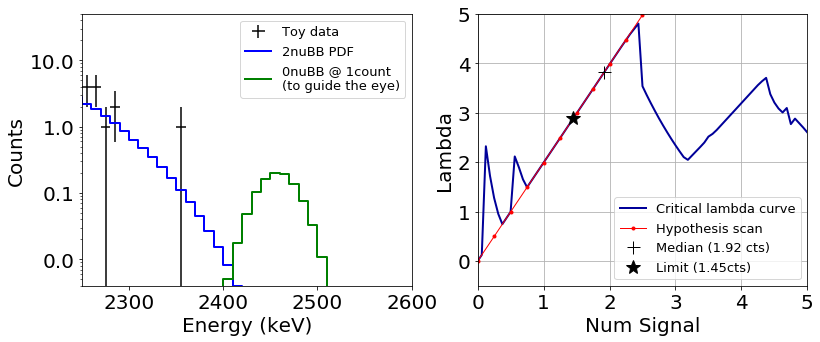

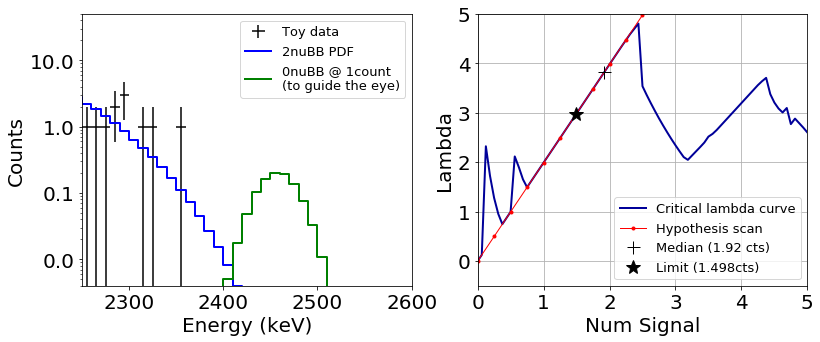

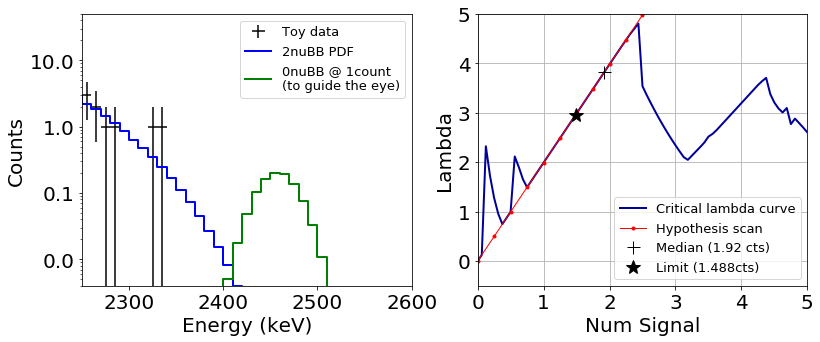

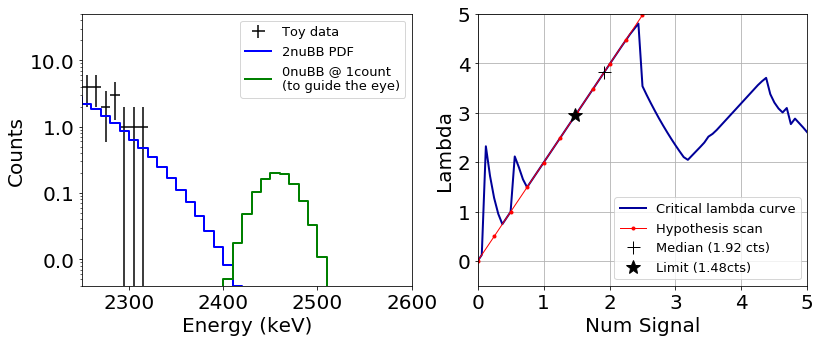

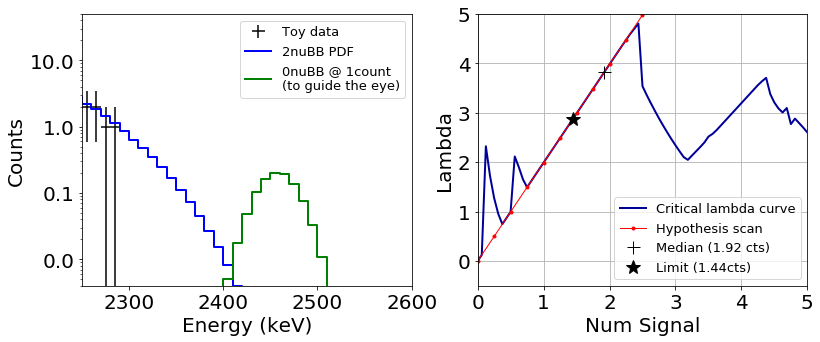

In [26]:
import matplotlib
from scipy.interpolate import interp1d

critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_ba_tagging_fine.txt')
critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_2nu_scaling_study_0.01.txt')

plt.rcParams['figure.figsize'] = (13,5)

pp = PdfPages('Plots/only_2nubkg_fits_worse_than_the_median.pdf')

for i in range(5):
    this_dataset = dfonepfive['dataset'].iloc[i]
    this_90CL = dfonepfive['90CL_crossing'].iloc[i]
    this_numsignal = dfonepfive['num_signal'].iloc[i]
    this_lambda = dfonepfive['lambda'].iloc[i]
    
    fig,ax = plt.subplots(ncols=2,nrows=1)
    
    hl.plot1d(ax[0],this_dataset.project([1]),color='k',crosses=True,label='Toy data')
    ax[0].set_yscale('log')
    ax[0].set_ylim(0.004,50.)
    ax[0].set_xlim(2250.,2600.)
    
    
    idx_2nu = likelihood.model.GetVariableIndexByName('Bb2n')
    idx_0nu = likelihood.model.GetVariableIndexByName('Bb0n')
    spec2nu = likelihood.model.pdfs[idx_2nu] * likelihood.model.variable_list[idx_2nu]['Value']
    spec0nu = likelihood.model.pdfs[idx_0nu] * likelihood.model.variable_list[idx_0nu]['Value']
    
    hl.plot1d(ax[0],spec2nu.project([1]),label='2nuBB PDF',linewidth=2)
    hl.plot1d(ax[0],spec0nu.project([1]),label='0nuBB @ 1count\n(to guide the eye)',linewidth=2)
    
    #ax[0].set_yticks([0.1,1.,10.],['0.1','1','10'])
    #ax[0].set_yticklabels(['0.1','1','10'])
    ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax[0].get_yaxis().get_major_formatter().labelOnlyBase=False
    ax[0].get_yaxis().get_major_formatter().set_scientific(False)
    ax[0].legend(fontsize=13,loc='upper right')
    ax[0].set_xlabel('Energy (keV)')
    ax[0].set_ylabel('Counts')
    
    Func = interp1d(critlam[:,0],critlam[:,1])
    
    ax[1].plot(critlam[:,0],critlam[:,1],'-',color=(0.,0.,0.6),linewidth=2,label='Critical lambda curve')
    ax[1].set_xlim(0.,5.)
    ax[1].set_ylim(-0.5,5.)
    #ax[1].set_xlim(0.5,1.5)
    #ax[1].set_ylim(1.,4.)
    ax[1].plot(this_numsignal,this_lambda,'-o',color=(1.,0.,0.),\
               linewidth=1.,markersize=3,label='Hypothesis scan')
    ax[1].plot(median,Func(median)+0.02,'+',markersize=13,\
               label='Median (1.92 cts)',markerfacecolor='None',\
              markeredgecolor='k',markeredgewidth=1)
    ax[1].plot(this_90CL,Func(this_90CL),'*k',markersize=14,label='Limit ({:4.4}cts)'.format(this_90CL))
    ax[1].set_xlabel('Num Signal')
    ax[1].set_ylabel('Lambda')
    ax[1].legend(fontsize=13,loc='lower right')
    ax[1].grid()
    print('90CL: {:3.3}\tLambdacalc @ 1: {:7.7}  \tCritical@1: {:7.7}'.format(\
                    this_90CL,this_lambda[4],Func(1.)))
    print('90CL: {:3.3}\tLambdacalc @ 1.5: {:7.7}  \tCritical@1.5: {:7.7}'.format(\
                    this_90CL,this_lambda[6],Func(1.5)))
    
    if i == 0:  
        plt.savefig('example_fit_90CL_lt_1p5_{}.png'.format(i),dpi=200,bbox_inches='tight')
    
    
    
    pp.savefig(fig,dpi=200,bbox_inches='tight')
    
pp.close()

<a class="anchor" id="justbelowmedian"></a>
# Fits with limits just below the median

90CL: 1.82	Lambdacalc @ 1: 1.991019  	Critical@1: 1.992202
90CL: 1.82	Lambdacalc @ 1.5: 2.986527  	Critical@1.5: 2.986803
90CL: 1.83	Lambdacalc @ 1: 1.990957  	Critical@1: 1.992202
90CL: 1.83	Lambdacalc @ 1.5: 2.986435  	Critical@1.5: 2.986803
90CL: 1.82	Lambdacalc @ 1: 1.991065  	Critical@1: 1.992202
90CL: 1.82	Lambdacalc @ 1.5: 2.986597  	Critical@1.5: 2.986803
90CL: 1.81	Lambdacalc @ 1: 1.991085  	Critical@1: 1.992202
90CL: 1.81	Lambdacalc @ 1.5: 2.986626  	Critical@1.5: 2.986803
90CL: 1.87	Lambdacalc @ 1: 1.990585  	Critical@1: 1.992202
90CL: 1.87	Lambdacalc @ 1.5: 2.985877  	Critical@1.5: 2.986803


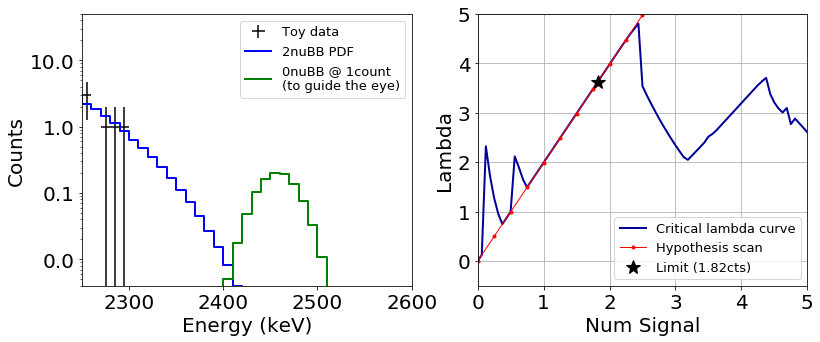

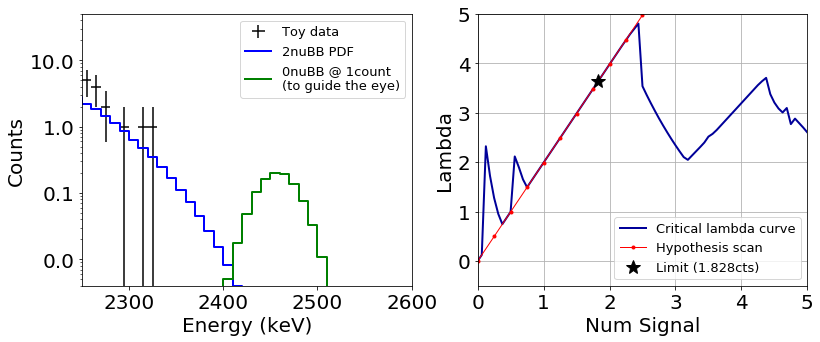

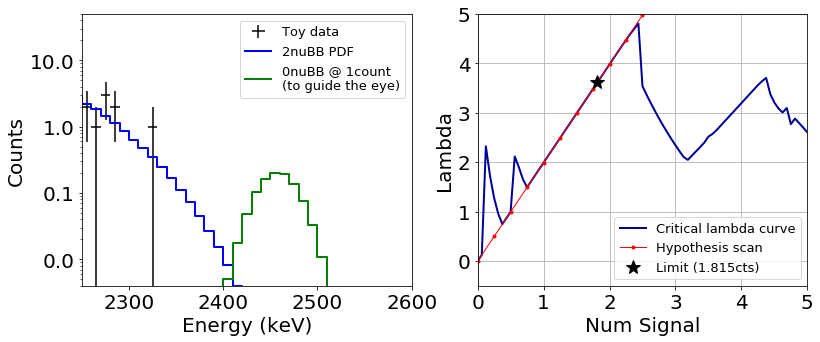

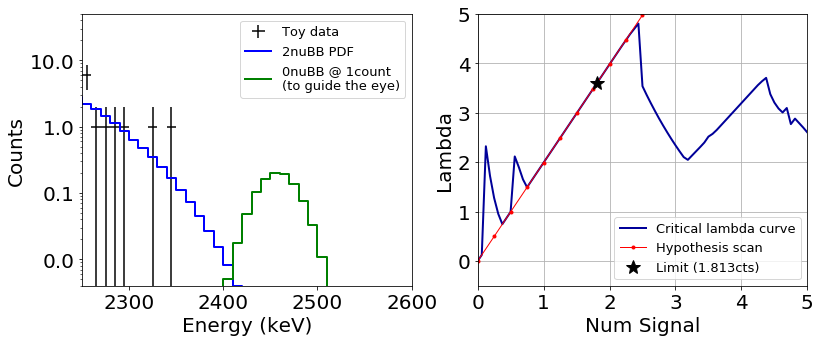

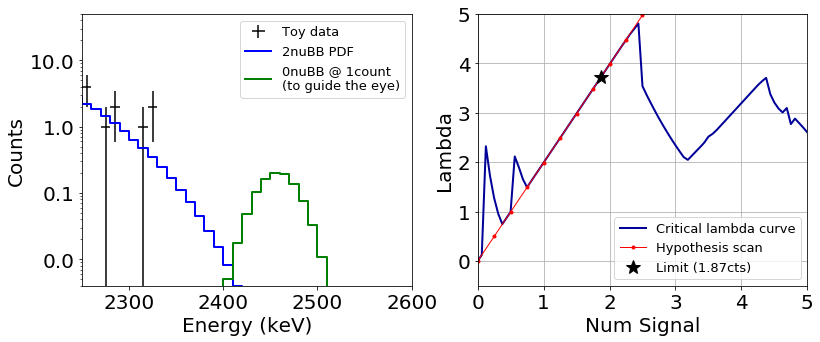

In [27]:
import matplotlib
from scipy.interpolate import interp1d

critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_ba_tagging_fine.txt')
critlam = np.genfromtxt('CriticalLambdaCurves/critical_lambda_2nu_scaling_study_0.01.txt')

plt.rcParams['figure.figsize'] = (13,5)

pp = PdfPages('Plots/only_2nubkg_fits_worse_than_the_median.pdf')

for i in range(5):
    this_dataset = dfmedianmask['dataset'].iloc[i]
    this_90CL = dfmedianmask['90CL_crossing'].iloc[i]
    this_numsignal = dfmedianmask['num_signal'].iloc[i]
    this_lambda = dfmedianmask['lambda'].iloc[i]
    
    fig,ax = plt.subplots(ncols=2,nrows=1)
    
    hl.plot1d(ax[0],this_dataset.project([1]),color='k',crosses=True,label='Toy data')
    ax[0].set_yscale('log')
    ax[0].set_ylim(0.004,50.)
    ax[0].set_xlim(2250.,2600.)
    
    
    idx_2nu = likelihood.model.GetVariableIndexByName('Bb2n')
    idx_0nu = likelihood.model.GetVariableIndexByName('Bb0n')
    spec2nu = likelihood.model.pdfs[idx_2nu] * likelihood.model.variable_list[idx_2nu]['Value']
    spec0nu = likelihood.model.pdfs[idx_0nu] * likelihood.model.variable_list[idx_0nu]['Value']
    
    hl.plot1d(ax[0],spec2nu.project([1]),label='2nuBB PDF',linewidth=2)
    hl.plot1d(ax[0],spec0nu.project([1]),label='0nuBB @ 1count\n(to guide the eye)',linewidth=2)
    
    #ax[0].set_yticks([0.1,1.,10.],['0.1','1','10'])
    #ax[0].set_yticklabels(['0.1','1','10'])
    ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax[0].get_yaxis().get_major_formatter().labelOnlyBase=False
    ax[0].get_yaxis().get_major_formatter().set_scientific(False)
    ax[0].legend(fontsize=13,loc='upper right')
    ax[0].set_xlabel('Energy (keV)')
    ax[0].set_ylabel('Counts')
    
    Func = interp1d(critlam[:,0],critlam[:,1])
    
    ax[1].plot(critlam[:,0],critlam[:,1],'-',color=(0.,0.,0.6),linewidth=2,label='Critical lambda curve')
    ax[1].set_xlim(0.,5.)
    ax[1].set_ylim(-0.5,5.)
    #ax[1].set_xlim(0.5,1.5)
    #ax[1].set_ylim(1.,4.)
    ax[1].plot(this_numsignal,this_lambda,'-o',color=(1.,0.,0.),\
               linewidth=1.,markersize=3,label='Hypothesis scan')
#     ax[1].plot(median,Func(median)+0.02,'+',markersize=13,\
#                label='Median (1.92 cts)',markerfacecolor='None',\
#               markeredgecolor='k',markeredgewidth=1)
    ax[1].plot(this_90CL,Func(this_90CL),'*k',markersize=14,label='Limit ({:4.4}cts)'.format(this_90CL))
    ax[1].set_xlabel('Num Signal')
    ax[1].set_ylabel('Lambda')
    ax[1].legend(fontsize=13,loc='lower right')
    ax[1].grid()
    print('90CL: {:3.3}\tLambdacalc @ 1: {:7.7}  \tCritical@1: {:7.7}'.format(\
                    this_90CL,this_lambda[4],Func(1.)))
    print('90CL: {:3.3}\tLambdacalc @ 1.5: {:7.7}  \tCritical@1.5: {:7.7}'.format(\
                    this_90CL,this_lambda[6],Func(1.5)))
    
    if i == 0:  
        plt.savefig('example_fit_90CL_just_below_median_{}.png'.format(i),dpi=200,bbox_inches='tight')
    
    
    
    pp.savefig(fig,dpi=200,bbox_inches='tight')
    
pp.close()

<a class="anchor" id="abovemedian"></a>
# Fits with limits just above the median

90CL: 2.03	Lambdacalc @ 1: 1.896456  	Critical@1: 1.988391
90CL: 2.03	Lambdacalc @ 1.5: 2.845918  	Critical@1.5: 2.963358
90CL: 2.07	Lambdacalc @ 1: 1.892016  	Critical@1: 1.988391
90CL: 2.07	Lambdacalc @ 1.5: 2.839355  	Critical@1.5: 2.963358
90CL: 1.95	Lambdacalc @ 1: 1.902835  	Critical@1: 1.988391
90CL: 1.95	Lambdacalc @ 1.5: 2.855311  	Critical@1.5: 2.963358
90CL: 1.99	Lambdacalc @ 1: 1.899534  	Critical@1: 1.988391
90CL: 1.99	Lambdacalc @ 1.5: 2.850699  	Critical@1.5: 2.963358
90CL: 2.07	Lambdacalc @ 1: 1.890368  	Critical@1: 1.988391
90CL: 2.07	Lambdacalc @ 1.5: 2.836846  	Critical@1.5: 2.963358


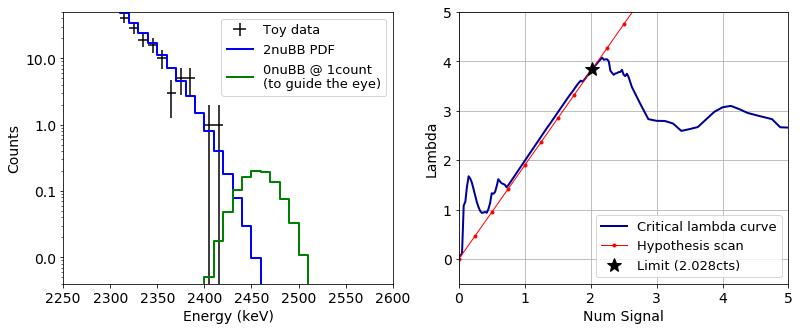

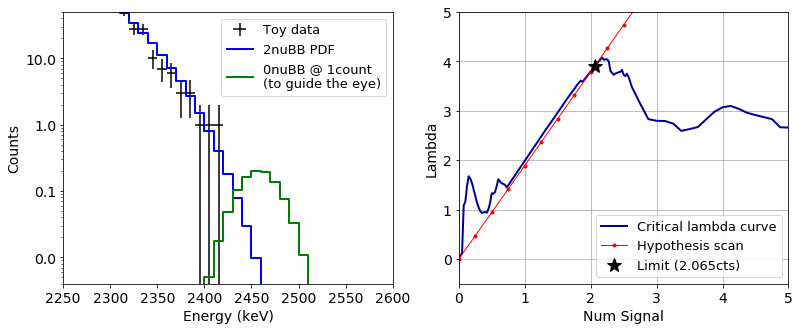

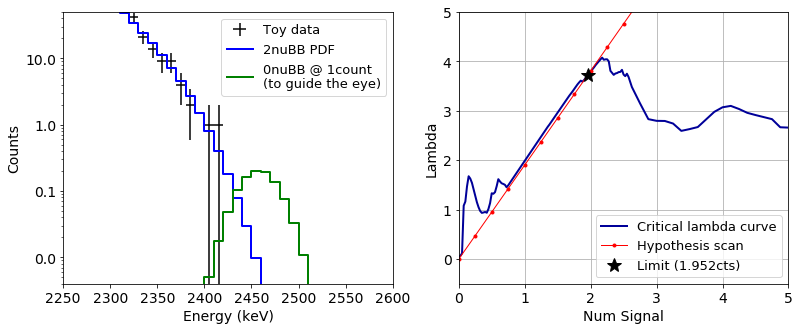

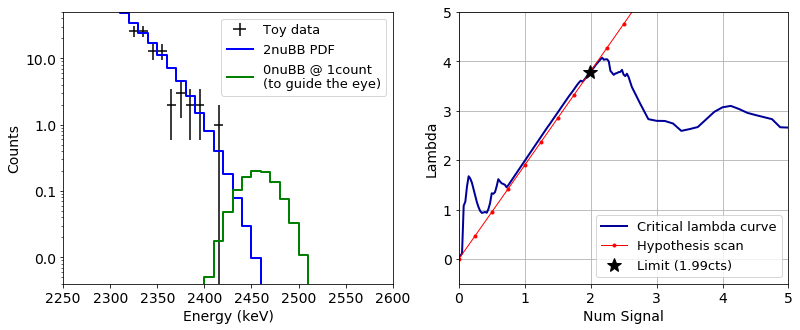

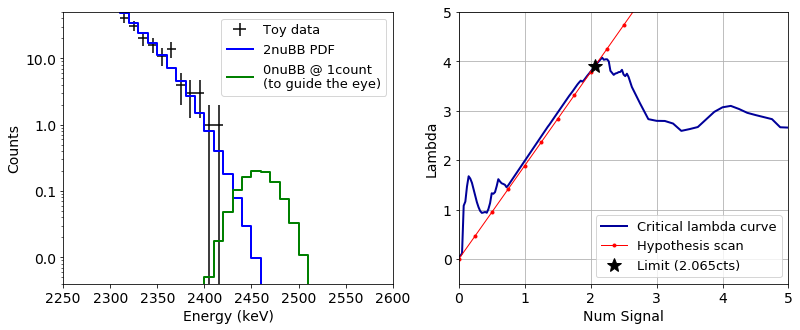

In [43]:
import matplotlib
from scipy.interpolate import interp1d

critlam = np.genfromtxt('critical_lambda_ba_tagging_fine.txt')

plt.rcParams['figure.figsize'] = (13,5)

pp = PdfPages('Plots/only_2nubkg_fits_worse_than_the_median.pdf')

for i in range(5):
    this_dataset = dfaftermedianmask['dataset'].iloc[i]
    this_90CL = dfaftermedianmask['90CL_crossing'].iloc[i]
    this_numsignal = dfaftermedianmask['num_signal'].iloc[i]
    this_lambda = dfaftermedianmask['lambda'].iloc[i]
    
    fig,ax = plt.subplots(ncols=2,nrows=1)
    
    hl.plot1d(ax[0],this_dataset.project([1]),color='k',crosses=True,label='Toy data')
    ax[0].set_yscale('log')
    ax[0].set_ylim(0.004,50.)
    ax[0].set_xlim(2250.,2600.)
    
    
    idx_2nu = likelihood.model.GetVariableIndexByName('Bb2n')
    idx_0nu = likelihood.model.GetVariableIndexByName('Bb0n')
    spec2nu = likelihood.model.pdfs[idx_2nu] * likelihood.model.variable_list[idx_2nu]['Value']
    spec0nu = likelihood.model.pdfs[idx_0nu] * likelihood.model.variable_list[idx_0nu]['Value']
    
    hl.plot1d(ax[0],spec2nu.project([1]),label='2nuBB PDF',linewidth=2)
    hl.plot1d(ax[0],spec0nu.project([1]),label='0nuBB @ 1count\n(to guide the eye)',linewidth=2)
    
    #ax[0].set_yticks([0.1,1.,10.],['0.1','1','10'])
    #ax[0].set_yticklabels(['0.1','1','10'])
    ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax[0].get_yaxis().get_major_formatter().labelOnlyBase=False
    ax[0].get_yaxis().get_major_formatter().set_scientific(False)
    ax[0].legend(fontsize=13,loc='upper right')
    ax[0].set_xlabel('Energy (keV)')
    ax[0].set_ylabel('Counts')
    
    Func = interp1d(critlam[:,0],critlam[:,1])
    
    ax[1].plot(critlam[:,0],critlam[:,1],'-',color=(0.,0.,0.6),linewidth=2,label='Critical lambda curve')
    ax[1].set_xlim(0.,5.)
    ax[1].set_ylim(-0.5,5.)
    #ax[1].set_xlim(0.5,1.5)
    #ax[1].set_ylim(1.,4.)
    ax[1].plot(this_numsignal,this_lambda,'-o',color=(1.,0.,0.),\
               linewidth=1.,markersize=3,label='Hypothesis scan')
#     ax[1].plot(median,Func(median)+0.02,'+',markersize=13,\
#                label='Median (1.92 cts)',markerfacecolor='None',\
#               markeredgecolor='k',markeredgewidth=1)
    ax[1].plot(this_90CL,Func(this_90CL),'*k',markersize=14,label='Limit ({:4.4}cts)'.format(this_90CL))
    ax[1].set_xlabel('Num Signal')
    ax[1].set_ylabel('Lambda')
    ax[1].legend(fontsize=13,loc='lower right')
    ax[1].grid()
    print('90CL: {:3.3}\tLambdacalc @ 1: {:7.7}  \tCritical@1: {:7.7}'.format(\
                    this_90CL,this_lambda[4],Func(1.)))
    print('90CL: {:3.3}\tLambdacalc @ 1.5: {:7.7}  \tCritical@1.5: {:7.7}'.format(\
                    this_90CL,this_lambda[6],Func(1.5)))
    
    if i == 0:  
        plt.savefig('example_fit_90CL_just_after_median_{}.png'.format(i),dpi=200,bbox_inches='tight')
    
    
    
    pp.savefig(fig,dpi=200,bbox_inches='tight')
    
pp.close()

In [50]:
spec0nu_E = spec0nu.project([1])
spec2nu_E = spec2nu.project([1])

threshold = 0.97
integral_0nu = np.sum(spec0nu_E.values)
bin_low_edges = spec0nu_E.bins[0][:-1]
bin_hi_edges = spec0nu_E.bins[0][1:]

for threshold in np.logspace(-1,0,100):
    print('\nThreshold: {:4.4}'.format(threshold))
    bins_included = []
    signal_bin_sum = 0.
    bin_counter = 0

    sorted_indices = np.flip(np.argsort(spec0nu_E.values))

    while signal_bin_sum < threshold * integral_0nu:
        signal_bin_sum += spec0nu_E.values[sorted_indices[bin_counter]]
        bins_included.append(sorted_indices[bin_counter])

        bin_counter += 1

    print('{} bins included in sum'.format(bin_counter))
    print('From {} to {}'.format(np.min(bin_low_edges[bins_included]),\
                                np.max(bin_hi_edges[bins_included])))
    print('Signal eff in range: {:4.4}'.format( \
                                    np.sum(spec0nu_E.values[bins_included]) / \
                                    np.sum(spec0nu_E.values)))
    print('Background in range: {:4.4}'.format(np.sum(spec2nu_E.values[bins_included])))







Threshold:  0.1
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.1024
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.1048
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.1072
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.1097
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.1123
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.115
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.1177
1 bins included in sum
From 2450.0 to 2460.0
Signal eff in range: 0.2021
Background in range: 0.009688

Threshold: 0.1205
1 bins i